# Loans Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('LoansDataset.csv')
df.head()

/var/folders/bh/crnltg950_n8l07mfm97qdtc0000gn/T/ipykernel_30656/2955071538.py:1: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('LoansDataset.csv')


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

In [5]:
df.duplicated().sum()

np.int64(5869)

In [6]:
df.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

In [7]:
df.isna().sum()/df.shape[0]

Loan ID                         0.000000
Customer ID                     0.000000
Loan Status                     0.000000
Current Loan Amount             0.000000
Term                            0.000000
Credit Score                    0.192049
Years in current job            0.042239
Home Ownership                  0.000000
Annual Income                   0.192049
Purpose                         0.000000
Monthly Debt                    0.000000
Years of Credit History         0.000000
Months since last delinquent    0.531047
Number of Open Accounts         0.000000
Number of Credit Problems       0.000000
Current Credit Balance          0.000000
Maximum Open Credit             0.000000
Bankruptcies                    0.002052
Tax Liens                       0.000099
dtype: float64

In [8]:
df.nunique()

Loan ID                         88910
Customer ID                     88910
Loan Status                         2
Current Loan Amount             22541
Term                                2
Credit Score                      326
Years in current job               11
Home Ownership                      4
Annual Income                   37983
Purpose                            16
Monthly Debt                    90362
Years of Credit History           508
Months since last delinquent      116
Number of Open Accounts            52
Number of Credit Problems          14
Current Credit Balance          33716
Maximum Open Credit             67309
Bankruptcies                        8
Tax Liens                          13
dtype: int64

In [9]:
freq_mo_last_delinquent = df['Months since last delinquent'].value_counts()

(array([33.,  1.,  1., 10., 25.,  2., 10., 13.,  8., 13.]),
 array([1.000e+00, 1.011e+02, 2.012e+02, 3.013e+02, 4.014e+02, 5.015e+02,
        6.016e+02, 7.017e+02, 8.018e+02, 9.019e+02, 1.002e+03]),
 <BarContainer object of 10 artists>)

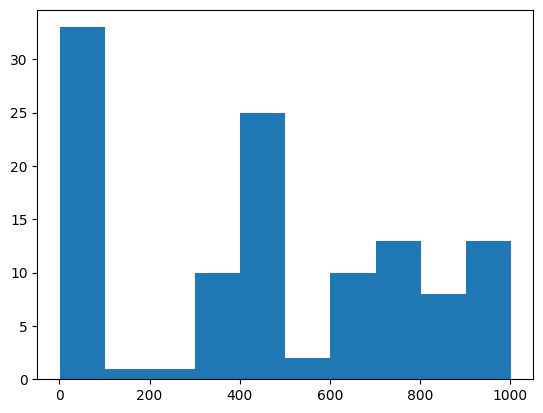

In [10]:
plt.hist(freq_mo_last_delinquent)

In [11]:
freq_mo_last_delinquent[0]

np.int64(235)

<Axes: >

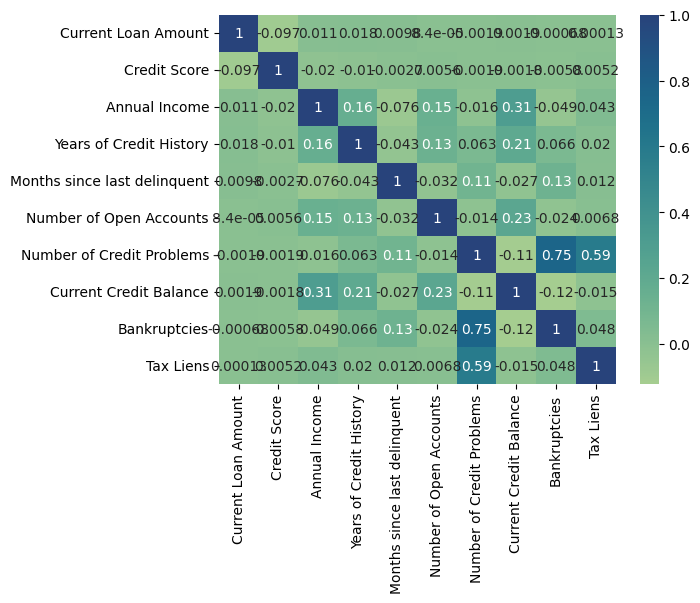

In [12]:
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, cmap='crest', annot=True, center=0.5)

Text(0.5, 0, 'Annual Income')

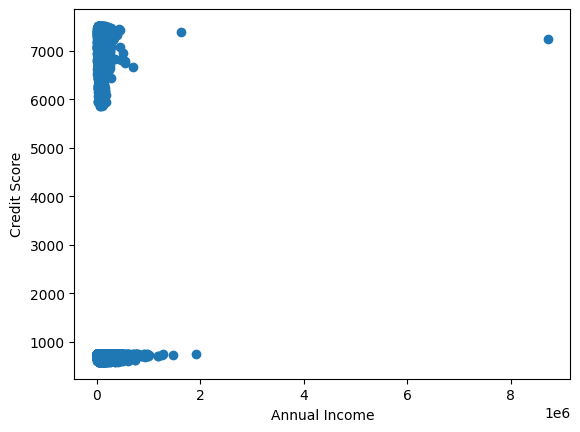

In [13]:
plt.scatter(df['Annual Income'], df['Credit Score'])
plt.ylabel('Credit Score')
plt.xlabel('Annual Income')

In [14]:
df['Annual Income'].describe().max()

np.float64(8713547.0)

In [15]:
outlier_index = df[df['Annual Income'] == 8713547.0].index
outlier_index

Index([3671], dtype='int64')

In [16]:
df_1_remove_outlier = df.drop(outlier_index)

In [17]:
df.count()

Loan ID                         111107
Customer ID                     111107
Loan Status                     111107
Current Loan Amount             111107
Term                            111107
Credit Score                     89769
Years in current job            106414
Home Ownership                  111107
Annual Income                    89769
Purpose                         111107
Monthly Debt                    111107
Years of Credit History         111107
Months since last delinquent     52104
Number of Open Accounts         111107
Number of Credit Problems       111107
Current Credit Balance          111107
Maximum Open Credit             111107
Bankruptcies                    110879
Tax Liens                       111096
dtype: int64

In [18]:
df_1_remove_outlier.count()

Loan ID                         111106
Customer ID                     111106
Loan Status                     111106
Current Loan Amount             111106
Term                            111106
Credit Score                     89768
Years in current job            106413
Home Ownership                  111106
Annual Income                    89768
Purpose                         111106
Monthly Debt                    111106
Years of Credit History         111106
Months since last delinquent     52104
Number of Open Accounts         111106
Number of Credit Problems       111106
Current Credit Balance          111106
Maximum Open Credit             111106
Bankruptcies                    110878
Tax Liens                       111095
dtype: int64

Text(0.5, 0, 'Annual Income')

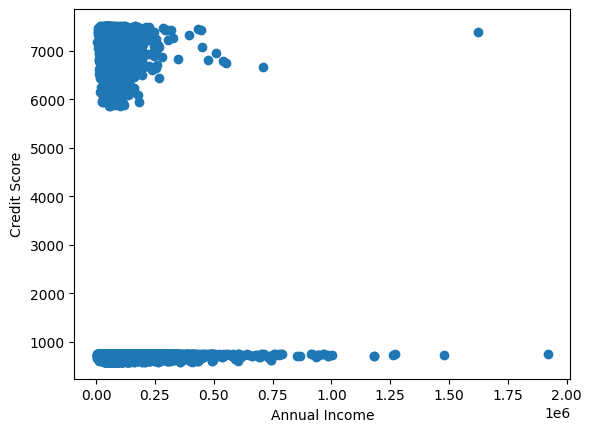

In [19]:
plt.scatter(df_1_remove_outlier['Annual Income'], df_1_remove_outlier['Credit Score'])
plt.ylabel('Credit Score')
plt.xlabel('Annual Income')

(array([8.4725e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 3.9000e+01, 7.8000e+02, 4.2240e+03]),
 array([ 585. , 1277.5, 1970. , 2662.5, 3355. , 4047.5, 4740. , 5432.5,
        6125. , 6817.5, 7510. ]),
 <BarContainer object of 10 artists>)

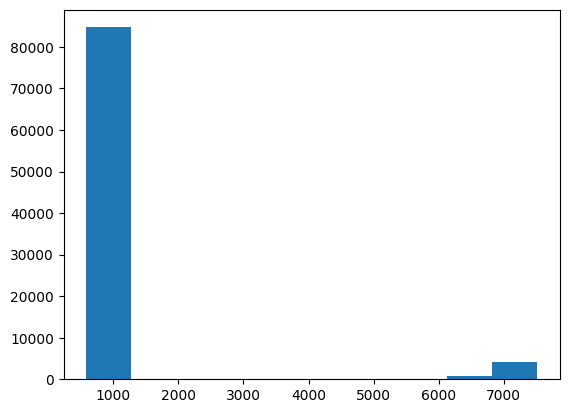

In [20]:
plt.hist(df_1_remove_outlier['Credit Score'])

In [21]:
df_1_remove_outlier['Credit Score'].value_counts()

Credit Score
747.0     2040
740.0     1954
746.0     1932
741.0     1922
742.0     1911
          ... 
5960.0       1
5860.0       1
5880.0       1
5900.0       1
6000.0       1
Name: count, Length: 326, dtype: int64

In [22]:
df['Years in current job'].value_counts()

Years in current job
10+ years    34551
2 years      10158
3 years       9133
< 1 year      9055
5 years       7559
1 year        7175
4 years       6828
6 years       6310
7 years       6186
8 years       5105
9 years       4354
Name: count, dtype: int64

In [23]:
job_year_counts = df['Years in current job'].value_counts()
job_year_counts

Years in current job
10+ years    34551
2 years      10158
3 years       9133
< 1 year      9055
5 years       7559
1 year        7175
4 years       6828
6 years       6310
7 years       6186
8 years       5105
9 years       4354
Name: count, dtype: int64

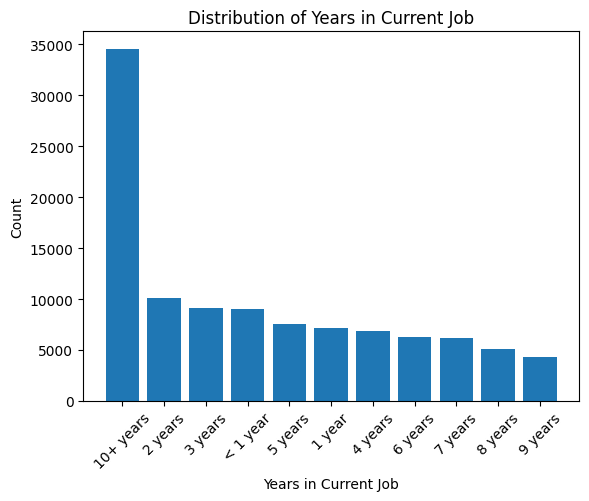

In [24]:
plt.bar(job_year_counts.index, job_year_counts.values)
plt.xlabel('Years in Current Job')
plt.ylabel('Count')
plt.title('Distribution of Years in Current Job')
plt.xticks(rotation=45)
plt.show()

In [25]:
custom_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']

job_year_counts = job_year_counts.reindex(custom_order)

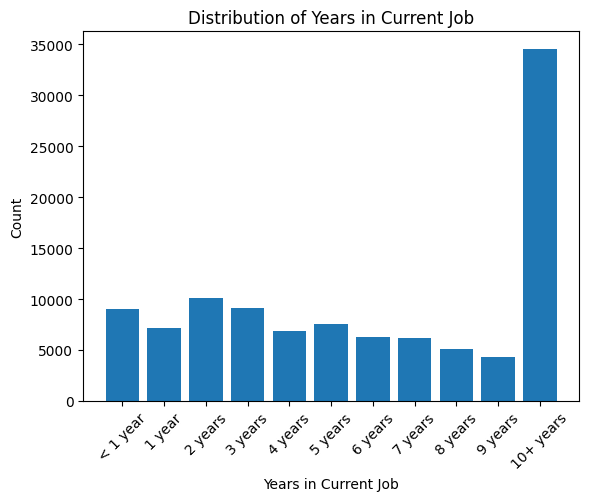

In [26]:
plt.bar(job_year_counts.index, job_year_counts.values)
plt.xlabel('Years in Current Job')
plt.ylabel('Count')
plt.title('Distribution of Years in Current Job')
plt.xticks(rotation=45)
plt.show()

In [27]:
df['Annual Income'].isnull();

In [28]:
income_null_rows_df = df[df['Annual Income'].isnull()]

In [29]:
income_null_rows_df.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job              906
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    11619
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                       45
Tax Liens                           4
dtype: int64

In [30]:
df_credit_over_5000 = df_1_remove_outlier[df_1_remove_outlier['Credit Score'] > 5000]
df_credit_over_5000

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,dddda579-91fc-479b-98b7-e035de24e924,fcd51025-8954-4b5b-816f-39cb1e66fc1f,Charged Off,19874,Long Term,7010.0,6 years,Own Home,54654.0,Debt Consolidation,1202.38,14.3,NaN,15,0,21693,25949,0.0,0.0
5040,5154e83f-4f72-431b-b6e5-c5a94f08a74a,dd2602f3-fba7-4a44-b2c6-2e722638838a,Charged Off,11199,Short Term,7180.0,3 years,Rent,40176.0,Debt Consolidation,736.56,8.8,NaN,17,0,5674,14079,0.0,0.0
5041,bebce2e5-bd21-4f6b-a5df-0e042b17ad24,9cd162b4-defa-4ab7-b5c4-252ff1be0e0c,Charged Off,12072,Long Term,7110.0,5 years,Home Mortgage,130780.0,Debt Consolidation,1547.56,9.8,NaN,17,0,18863,21532,0.0,0.0
5042,031a7b4f-2b0f-4f09-97c0-942da5ec7d98,d22f8176-c506-4fba-b8b9-fb97a47a7cd2,Charged Off,5612,Short Term,7330.0,10+ years,Rent,68915.0,Debt Consolidation,1349.58,15.6,NaN,14,1,2262,12927,1.0,0.0


In [31]:
df_credit_under_5000 = df_1_remove_outlier[df_1_remove_outlier['Credit Score'] < 5000]
df_credit_under_5000

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5044,bac918fa-35e0-40a2-af65-58b456a742e7,c96da120-30d2-4acd-9740-e4d280f4bfcb,Fully Paid,99999999,Short Term,739.0,3 years,Home Mortgage,60012.0,Home Improvements,1295.26,16.6,33.0,16,0,427,8542,0.0,0.0
5045,bb983383-0aa0-4d13-9b7f-05f694672374,d602647a-0820-4025-b93d-9f962f958acf,Fully Paid,99999999,Short Term,704.0,9 years,Rent,54802.0,Debt Consolidation,1114.31,16.9,30.0,12,0,4716,5822,0.0,0.0
5046,0c7fcf5e-ec4a-46d5-8175-15c846df7c74,a709e893-b6b6-49ed-b775-bdef1155c78d,Fully Paid,99999999,Short Term,751.0,5 years,Rent,35693.0,Debt Consolidation,626.12,11.0,NaN,7,0,742,9166,0.0,0.0
5047,878c4189-bd53-4836-a16d-203519034758,64fa8876-80fa-4a69-b16b-144a8ecfb14a,Fully Paid,99999999,Short Term,735.0,NaN,Home Mortgage,33884.0,Debt Consolidation,683.34,18.9,10.0,12,0,10835,18028,0.0,0.0
5048,193ac878-4d50-4be0-995b-20896ebc9ad8,02a4bc6d-db02-406b-9bf6-8e0dd42782eb,Fully Paid,99999999,Short Term,745.0,3 years,Own Home,103343.0,Debt Consolidation,1300.41,14.1,NaN,14,0,22746,42835,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111102,503f01e2-c3c4-4b10-886e-f15de57b6f1a,27a17610-1d8c-48a7-b0db-2d81a4fa099a,Fully Paid,15654,Long Term,686.0,10+ years,Rent,43050.0,Debt Consolidation,889.69,14.1,49.0,18,0,14730,29757,0.0,0.0
111103,8af53bc0-56a4-4801-a960-52a46a90b33f,c124ca71-f42a-47cc-8ec2-236f7e9868a5,Fully Paid,15237,Short Term,706.0,10+ years,Home Mortgage,60948.0,Debt Consolidation,700.9,15.9,48.0,11,0,17733,23060,0.0,0.0
111104,96efd327-f965-42ae-8b2b-d2555205ce19,7d959a54-8eeb-4df6-b582-046f889e4cff,Fully Paid,10413,Short Term,719.0,5 years,Home Mortgage,66945.0,Debt Consolidation,1210.59,8.7,NaN,11,0,5205,6348,0.0,0.0
111105,ec19166c-70c5-4d49-adb6-fb3fc15024a2,5723fbf2-1ce8-4752-8bee-1bebf339f278,Fully Paid,34447,Short Term,626.0,10+ years,Home Mortgage,78736.0,Debt Consolidation,1476.3,30.4,9.0,12,0,32318,37580,0.0,0.0


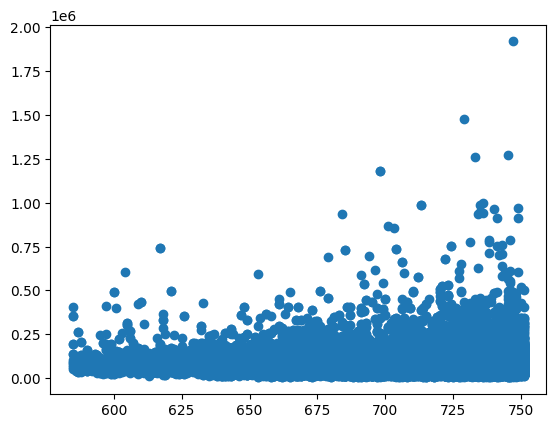

In [32]:
plt.scatter(df_credit_under_5000['Credit Score'],df_credit_under_5000['Annual Income'])

In [33]:
df_creditunder500_annualincome = df_credit_under_5000[['Credit Score', 'Annual Income']]

In [34]:
df_creditunder500_annualincome.corr()

,Credit Score,Annual Income
Credit Score,1.000000,-0.003906
Annual Income,-0.003906,1.000000


(array([98369.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12738.]),
 array([4.91000000e+02, 1.00004418e+07, 2.00003926e+07, 3.00003434e+07,
        4.00002942e+07, 5.00002450e+07, 6.00001958e+07, 7.00001466e+07,
        8.00000974e+07, 9.00000482e+07, 9.99999990e+07]),
 <BarContainer object of 10 artists>)

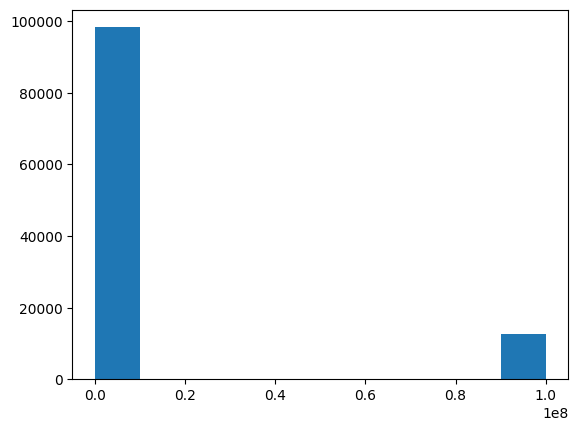

In [35]:
plt.hist(df['Current Loan Amount'])

In [36]:
df['Term'].isna().sum()

np.int64(0)

In [37]:
df['Loan ID'].nunique()

88910

In [38]:
df['Loan ID'].duplicated().sum()

np.int64(22197)

In [39]:
df['Customer ID'].duplicated().sum()

np.int64(22197)

In [40]:
df['Loan Status'].isna().sum()

np.int64(0)

In [41]:
df['Home Ownership'].unique()

array(['Rent', 'Home Mortgage', 'Own Home', 'HaveMortgage'], dtype=object)

In [42]:
df.groupby(df['Home Ownership']).count()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Home Ownership,,,,,,,,,,,,,,,,,,
HaveMortgage,233,233,233,233,233,199,222,199,233,233,233,116,233,233,233,233,232,233
Home Mortgage,53818,53818,53818,53818,53818,43393,51682,43393,53818,53818,53818,26886,53818,53818,53818,53818,53733,53814
Own Home,10188,10188,10188,10188,10188,8299,9339,8299,10188,10188,10188,4707,10188,10188,10188,10188,10166,10184
Rent,46868,46868,46868,46868,46868,37878,45171,37878,46868,46868,46868,20395,46868,46868,46868,46868,46748,46865


Text(0, 0.5, 'Annual Income')

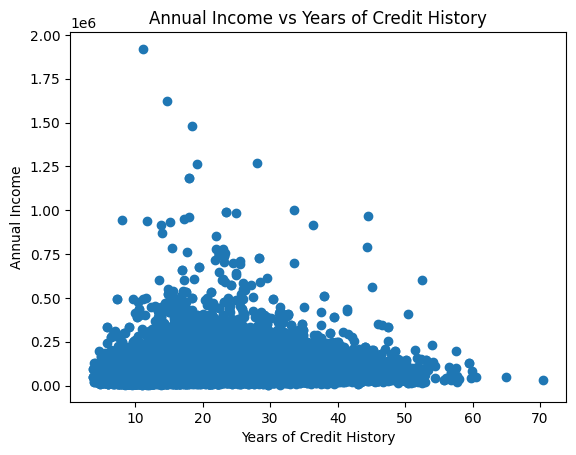

In [43]:
plt.scatter(df_1_remove_outlier['Years of Credit History'], df_1_remove_outlier['Annual Income'])
plt.title('Annual Income vs Years of Credit History')
plt.xlabel('Years of Credit History')
plt.ylabel('Annual Income')

In [44]:
df['Years of Credit History'].isna().sum()

np.int64(0)

In [45]:
df['Purpose'].unique()

array(['Debt Consolidation', 'Home Improvements', 'other',
       'Business Loan', 'small_business', 'Other', 'moving', 'Buy a Car',
       'Medical Bills', 'Buy House', 'Take a Trip', 'vacation',
       'major_purchase', 'Educational Expenses', 'wedding',
       'renewable_energy'], dtype=object)

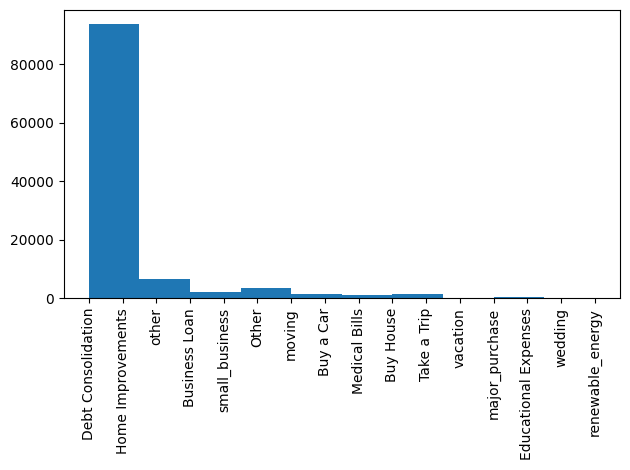

In [46]:
plt.hist(df['Purpose'])
plt.xticks(rotation=90)
plt.tight_layout()

In [47]:
type(df['Monthly Debt'][1])

str

In [48]:
df['Monthly Debt']

0          777.39
1          892.09
2         1244.02
3          990.94
4          503.71
           ...   
111102     889.69
111103      700.9
111104    1210.59
111105     1476.3
111106     668.71
Name: Monthly Debt, Length: 111107, dtype: object

In [49]:
df_1_remove_outlier['Monthly Debt'] = df['Monthly Debt'].astype(float)


ValueError: could not convert string to float: '$1051.41'

In [ ]:
df_1_remove_outlier[df_1_remove_outlier['Monthly Debt'].str.contains(r'[^0-9.]', na=False)]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
10,9634dd33-b16d-49f8-b9f6-2d9e1578798c,0d82eca5-ee60-4ebe-8387-54f1153a326f,Charged Off,19838,Long Term,7010.0,6 years,Home Mortgage,79352.0,Debt Consolidation,$1051.41,14.3,6.0,13,0,15780,22511,0.0,0.0
55,ae31692e-3e18-40ce-b169-72b8f558b0ff,208ac22f-e48d-4f52-beb0-7ac79d8f8d21,Charged Off,4407,Short Term,7340.0,3 years,Home Mortgage,36058.0,other,$157.15,13.1,28.0,6,0,2517,6308,0.0,0.0
105,963c40c3-84cf-4b77-a476-5219ec71a482,f8993407-f975-4b5a-818b-92ce25569b0b,Charged Off,10224,Short Term,7160.0,7 years,Rent,73613.0,Debt Consolidation,$944.7,32.1,13.0,10,0,21448,32695,0.0,0.0
54811,e900c241-bbef-44cd-8284-bc1886100ff1,5585d671-e587-4527-a6dd-1a372a83d49d,Fully Paid,9605,Short Term,706.0,8 years,Home Mortgage,83955.0,Debt Consolidation,$481.34,12.4,NaN,4,1,1479,6429,1.0,0.0
54814,89171b0d-8ed0-4e99-82e4-e576641124eb,bcd7425f-ea8c-4f1e-890c-be04aff41098,Fully Paid,14089,Long Term,701.0,10+ years,Home Mortgage,63596.0,Debt Consolidation,$1838.98,15.1,NaN,11,0,16128,16340,0.0,0.0
54822,34a08cc8-b381-4cc3-b8ed-fc987cead0b1,c38fd737-72ae-4e25-aa42-29c522b5a5c6,Fully Paid,9397,Short Term,668.0,2 years,Rent,52400.0,Debt Consolidation,$471.6,15.6,13.0,4,0,3293,6547,0.0,0.0


Text(0, 0.5, 'Frequency')

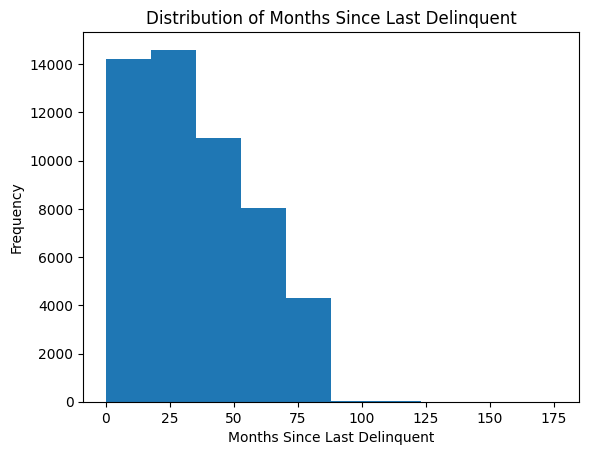

In [ ]:
plt.hist(df['Months since last delinquent'])
plt.title('Distribution of Months Since Last Delinquent')
plt.xlabel('Months Since Last Delinquent')
plt.ylabel('Frequency')

In [ ]:
df['Months since last delinquent'].value_counts()

Months since last delinquent
12.0     1002
13.0      999
15.0      987
14.0      958
8.0       955
         ... 
139.0       1
130.0       1
115.0       1
141.0       1
143.0       1
Name: count, Length: 116, dtype: int64

In [ ]:
df[df['Months since last delinquent'] == 0].count().sum()

np.int64(4220)

Text(0, 0.5, 'Frequency')

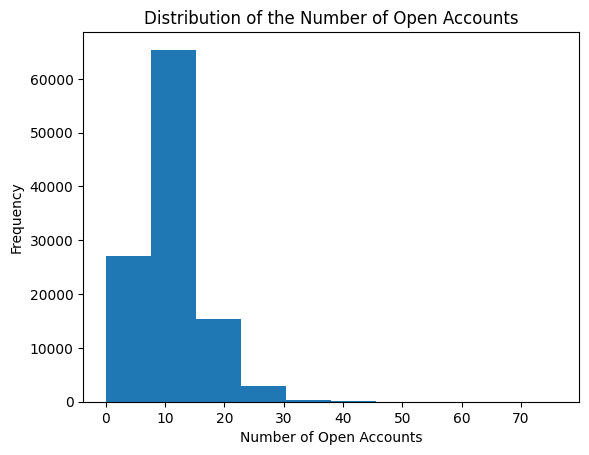

In [ ]:
plt.hist(df['Number of Open Accounts'])
plt.title('Distribution of the Number of Open Accounts')
plt.xlabel('Number of Open Accounts')
plt.ylabel('Frequency')

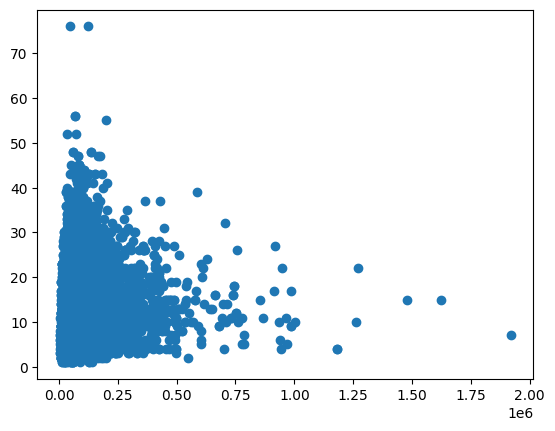

In [ ]:
plt.scatter(df_1_remove_outlier['Annual Income'], df_1_remove_outlier['Number of Open Accounts'])

Text(0, 0.5, 'Frequency')

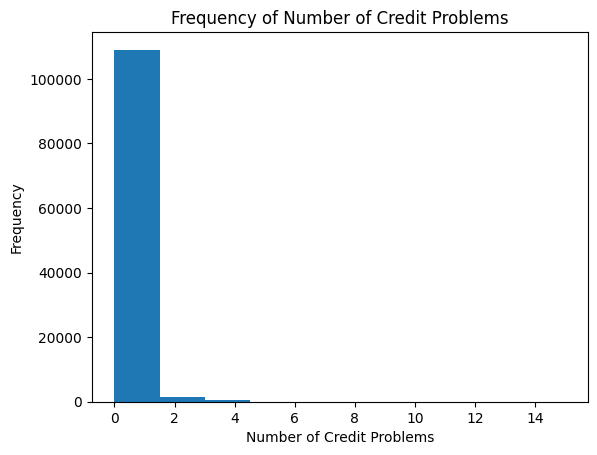

In [ ]:
plt.hist(df['Number of Credit Problems'])
plt.title('Frequency of Number of Credit Problems')
plt.xlabel('Number of Credit Problems')
plt.ylabel('Frequency')

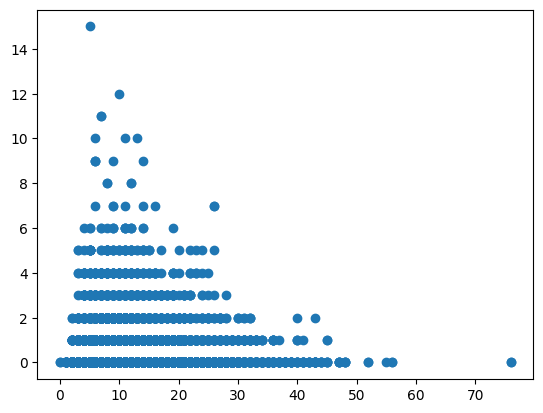

In [ ]:
plt.scatter(df['Number of Open Accounts'], df['Number of Credit Problems'])

Text(0.5, 1.0, 'Number of Credit Problems by Number of Open Accounts')

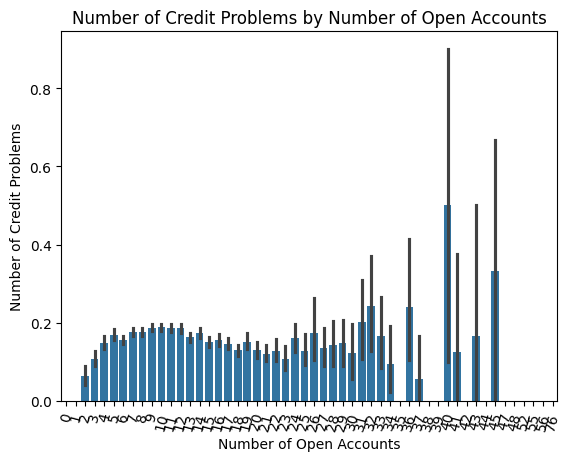

In [ ]:
sns.barplot(data=df, x='Number of Open Accounts', y='Number of Credit Problems')
plt.xticks(rotation=75)
plt.title('Number of Credit Problems by Number of Open Accounts')


In [ ]:
df['Months since last delinquent'].describe()

count    52104.000000
mean        34.902272
std         21.970696
min          0.000000
25%         16.000000
50%         32.000000
75%         51.000000
max        176.000000
Name: Months since last delinquent, dtype: float64

In [ ]:
sns.barplot(data=df, x='Number of Open Accounts', y='Number of Credit Problems')
plt.xticks(rotation=75)
plt.title('Number of Credit Problems by Number of Open Accounts')


Text(0.5, 0, 'Number of Credit Problems')

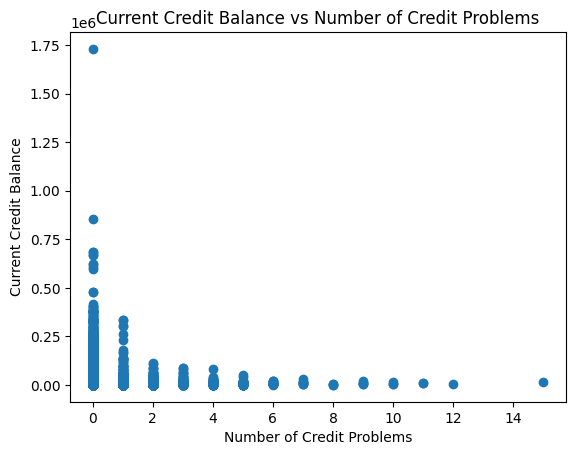

In [ ]:
plt.scatter(df['Number of Credit Problems'],df['Current Credit Balance'])
plt.title('Current Credit Balance vs Number of Credit Problems')
plt.ylabel('Current Credit Balance')
plt.xlabel('Number of Credit Problems')

In [ ]:
df['Current Credit Balance'].max()

np.int64(1730472)

In [ ]:
df[df['Current Credit Balance'] == 1730472]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
4012,c194cb68-1c4d-4bba-8433-98cf4e0f357d,3e4ec65d-94de-4309-afaa-d5f5055c4053,Charged Off,34675,Short Term,7320.0,10+ years,Home Mortgage,396280.0,other,10831.65,32.5,NaN,28,0,1730472,4483087,0.0,0.0


In [ ]:
df['Maximum Open Credit'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 111107 entries, 0 to 111106
Series name: Maximum Open Credit
Non-Null Count   Dtype 
--------------   ----- 
111107 non-null  object
dtypes: object(1)
memory usage: 868.2+ KB


In [ ]:
type(df['Maximum Open Credit'][0])

str

In [ ]:
df['Monthly Debt']

0          777.39
1          892.09
2         1244.02
3          990.94
4          503.71
           ...   
111102     889.69
111103      700.9
111104    1210.59
111105     1476.3
111106     668.71
Name: Monthly Debt, Length: 111107, dtype: object

In [ ]:
df_lambda = df['Monthly Debt'].apply(lambda x: str(x).replace('$','')).astype(float)

In [ ]:
df_lambda

0          777.39
1          892.09
2         1244.02
3          990.94
4          503.71
           ...   
111102     889.69
111103     700.90
111104    1210.59
111105    1476.30
111106     668.71
Name: Monthly Debt, Length: 111107, dtype: float64

In [ ]:
df['Maximum Open Credit'].unique()

array(['7946', '77961', '14815', ..., 11431, 33389, 10634],
      shape=(67309,), dtype=object)

In [ ]:
df_1_remove_outlier[df_1_remove_outlier['Maximum Open Credit'].str.contains(r'[^0-9.]', na=False)]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
4930,e42ae1f7-74b5-46d7-95ce-46a88918ba12,a679ed55-963a-4de6-8be0-4364eb601b6f,Charged Off,2052,Short Term,7030.0,10+ years,Rent,95105.0,Debt Consolidation,1910.02,22.4,37.0,9,0,0,#VALUE!,0.0,0.0
37357,b798f46b-e27b-4823-af83-294b1ffc3490,f61890c5-e264-4b0f-a047-9cfa03b9d182,Charged Off,1470,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,506.34,15.3,26.0,3,0,0,#VALUE!,0.0,0.0


Text(0, 0.5, 'Frequency')

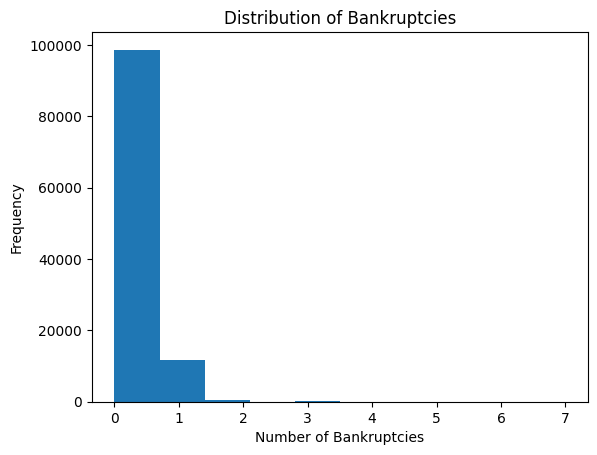

In [ ]:
plt.hist(df['Bankruptcies'])
plt.title('Distribution of Bankruptcies')
plt.xlabel('Number of Bankruptcies')
plt.ylabel('Frequency')

In [ ]:
df['Tax Liens'].value_counts()

Tax Liens
0.0     108964
1.0       1485
2.0        408
3.0        124
4.0         66
5.0         19
6.0         12
7.0          7
9.0          5
8.0          2
11.0         2
15.0         1
10.0         1
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

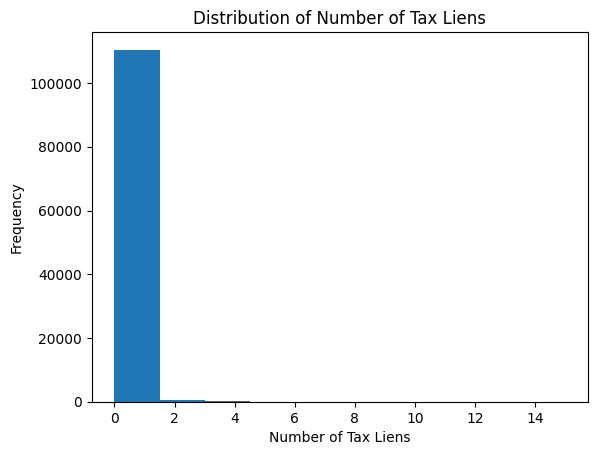

In [ ]:
plt.hist(df['Tax Liens'])
plt.title('Distribution of Number of Tax Liens')
plt.xlabel('Number of Tax Liens')
plt.ylabel('Frequency')

In [ ]:
df['Tax Liens'].isna().sum()

np.int64(11)

In [53]:
df_credit_under_5000['Credit Score'].describe()

count    84725.000000
mean       716.612735
std         28.112959
min        585.000000
25%        704.000000
50%        722.000000
75%        739.000000
max        751.000000
Name: Credit Score, dtype: float64

In [54]:
df['Number of Open Accounts'].describe()

count    111107.000000
mean         11.125105
std           5.010267
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          76.000000
Name: Number of Open Accounts, dtype: float64

In [55]:
df['Number of Credit Problems'].describe()

count    111107.000000
mean          0.168027
std           0.484212
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: Number of Credit Problems, dtype: float64

In [73]:
df[df['Number of Credit Problems'] > (df['Number of Credit Problems'].std()*10)].count()

Loan ID                         102
Customer ID                     102
Loan Status                     102
Current Loan Amount             102
Term                            102
Credit Score                     88
Years in current job             96
Home Ownership                  102
Annual Income                    88
Purpose                         102
Monthly Debt                    102
Years of Credit History         102
Months since last delinquent     65
Number of Open Accounts         102
Number of Credit Problems       102
Current Credit Balance          102
Maximum Open Credit             102
Bankruptcies                    102
Tax Liens                       102
dtype: int64

In [70]:
df[df['Current Credit Balance'] > (df['Current Credit Balance'].std()*10)].count()

Loan ID                         174
Customer ID                     174
Loan Status                     174
Current Loan Amount             174
Term                            174
Credit Score                    143
Years in current job            165
Home Ownership                  174
Annual Income                   143
Purpose                         174
Monthly Debt                    174
Years of Credit History         174
Months since last delinquent     63
Number of Open Accounts         174
Number of Credit Problems       174
Current Credit Balance          174
Maximum Open Credit             174
Bankruptcies                    174
Tax Liens                       174
dtype: int64

In [78]:
df[df['Number of Open Accounts'] > (df['Number of Open Accounts'].std()*5)].count()

Loan ID                         1452
Customer ID                     1452
Loan Status                     1452
Current Loan Amount             1452
Term                            1452
Credit Score                    1196
Years in current job            1416
Home Ownership                  1452
Annual Income                   1196
Purpose                         1452
Monthly Debt                    1452
Years of Credit History         1452
Months since last delinquent     743
Number of Open Accounts         1452
Number of Credit Problems       1452
Current Credit Balance          1452
Maximum Open Credit             1452
Bankruptcies                    1447
Tax Liens                       1452
dtype: int64

In [82]:
df[df['Annual Income'] > (df['Annual Income'].std()*8)].count()

Loan ID                         123
Customer ID                     123
Loan Status                     123
Current Loan Amount             123
Term                            123
Credit Score                    123
Years in current job            123
Home Ownership                  123
Annual Income                   123
Purpose                         123
Monthly Debt                    123
Years of Credit History         123
Months since last delinquent     64
Number of Open Accounts         123
Number of Credit Problems       123
Current Credit Balance          123
Maximum Open Credit             123
Bankruptcies                    121
Tax Liens                       123
dtype: int64

In [84]:
current_loan_adj = df[df['Current Loan Amount'] < 90000000]

(array([ 7623., 16132., 19582., 13649., 13275., 10360.,  6454.,  3651.,
         2997.,  4646.]),
 array([  491. ,  4029.4,  7567.8, 11106.2, 14644.6, 18183. , 21721.4,
        25259.8, 28798.2, 32336.6, 35875. ]),
 <BarContainer object of 10 artists>)

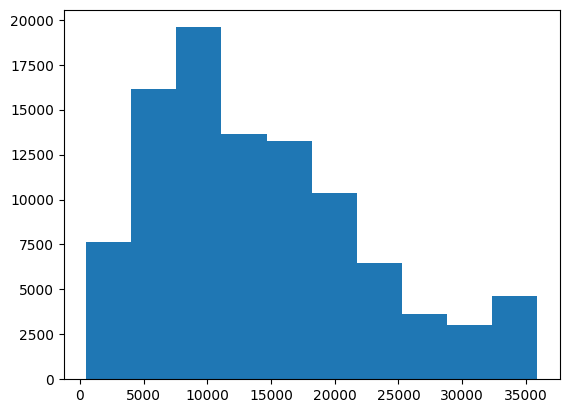

In [86]:
plt.hist(current_loan_adj['Current Loan Amount'])

In [89]:
current_loan_adj['Current Loan Amount'].describe()

count    98369.000000
mean     14182.062144
std       8459.992025
min        491.000000
25%       7830.000000
50%      12145.000000
75%      19660.000000
max      35875.000000
Name: Current Loan Amount, dtype: float64

In [94]:
current_loan_adj[current_loan_adj['Current Loan Amount'] > (current_loan_adj['Current Loan Amount'].std()*5)].count()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [97]:
df_monthly_debt = df['Monthly Debt'].apply(lambda x: str(x).replace('$','')).astype(float)

In [101]:
df_monthly_debt

0          777.39
1          892.09
2         1244.02
3          990.94
4          503.71
           ...   
111102     889.69
111103     700.90
111104    1210.59
111105    1476.30
111106     668.71
Name: Monthly Debt, Length: 111107, dtype: float64

In [100]:
df_monthly_debt.describe()

count    111107.000000
mean        971.970120
std         641.640829
min           0.000000
25%         537.755000
50%         852.720000
75%        1262.630000
max       22939.120000
Name: Monthly Debt, dtype: float64

In [104]:
df_monthly_debt[df_monthly_debt > (df_monthly_debt.std()*5)].count()

np.int64(957)

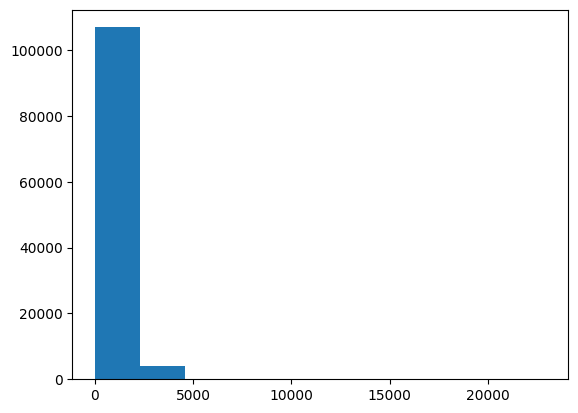

In [106]:
plt.hist(df_monthly_debt);

In [114]:
df[df['Annual Income'].isna()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
17782,87b6a064-b524-4cff-a968-b176bdc70075,000bbb5d-3a62-4712-908e-caacd7a815d5,Fully Paid,33231,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,1334.28,17.7,NaN,13,0,38005,68602,0.0,0.0
17783,4850727e-1ab2-4af1-b269-a95dd99ae975,4498fc97-e3f6-4789-b81b-c971fe967bb3,Fully Paid,23609,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,86.91,15.0,NaN,15,0,372,13772,0.0,0.0
17784,54a17b9a-c581-4f08-bc2f-21e2765e57c6,2b0ca10b-5a2c-4521-9c3f-7a55de743006,Charged Off,35651,Long Term,NaN,9 years,Rent,NaN,Debt Consolidation,1489.53,27.0,73.0,6,0,9857,10183,0.0,0.0
17785,02fa33d7-7fab-4f13-b30a-418d12221ba1,5c4c3d3b-6199-402b-8d36-0952ffcc700f,Charged Off,8086,Long Term,NaN,10+ years,Home Mortgage,NaN,Debt Consolidation,662.09,32.5,46.0,22,1,11465,22219,1.0,0.0
17786,42d53764-b5f5-4161-8132-dc1ac88efa62,c7be3971-5532-4ba8-b01a-caad8c48f034,Fully Paid,10977,Short Term,NaN,10+ years,Rent,NaN,Debt Consolidation,968.12,19.9,NaN,5,1,9095,10370,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39115,5908e7d9-cdb3-426f-acb0-e4a364e27e5b,2cf8860d-4951-40ae-bd93-fae3dbebacda,Charged Off,13684,Long Term,NaN,1 year,Rent,NaN,small_business,634.27,14.2,71.0,15,0,0,0,0.0,0.0
39116,8c39e4cf-383a-4090-a3d4-a64ab51be652,0549a5d7-a0ea-4cdc-b0e9-b46b42b5042a,Fully Paid,2608,Short Term,NaN,2 years,Rent,NaN,other,667.06,15.0,55.0,11,1,10117,17971,1.0,0.0
39117,b7050967-abfe-4c0a-b5c3-dee27c539ee7,776dffa3-a55a-4e34-bb51-856251b92afe,Fully Paid,9902,Short Term,NaN,1 year,Rent,NaN,Debt Consolidation,799.26,15.0,18.0,3,0,6568,6439,0.0,0.0
39118,71cf244e-35bc-463e-9860-006abd869107,45d3f269-6a47-4f76-a956-60bdb93d44f4,Fully Paid,8401,Short Term,NaN,1 year,Home Mortgage,NaN,Debt Consolidation,667.35,21.6,NaN,7,0,6937,14855,0.0,0.0


In [ ]:
df_max_open = df[df['Maximum Open Credit'] != '#VALUE!'].copy()
# df_max_open['Maximum Open Credit'] = pd.to_numeric(df_max_open['Maximum Open Credit'], errors='coerce')

In [137]:
df_max_open2 = df_max_open['Maximum Open Credit'].apply(lambda x: str(x).strip("'")).astype(float)

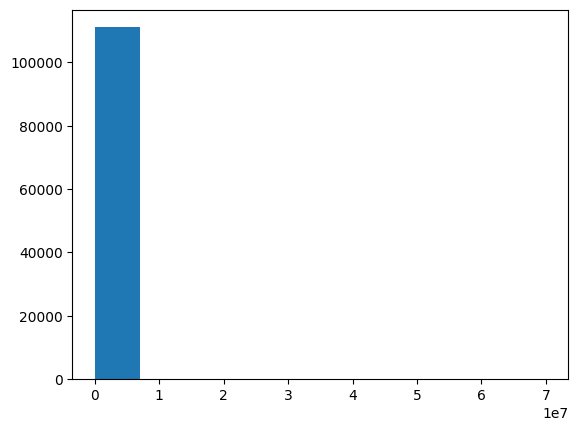

In [155]:
plt.hist(df_max_open2);

In [154]:
df_max_open2[df_max_open2 > 10000000]

18934    59305735.0
22193    12158639.0
23155    28748988.0
26426    44559330.0
45055    12068767.0
58529    17275104.0
58916    69988086.0
60994    10750537.0
74578    36284335.0
79898    22242873.0
Name: Maximum Open Credit, dtype: float64

In [156]:
df_max_open2.describe()

count    1.111050e+05
mean     3.438644e+04
std      3.643027e+05
min      0.000000e+00
25%      1.241700e+04
50%      2.124300e+04
75%      3.558400e+04
max      6.998809e+07
Name: Maximum Open Credit, dtype: float64

In [161]:
df_max_open2[df_max_open2 > (df_max_open2.std()*10)].count()

np.int64(25)

In [162]:
new_df = pd.read_csv('LoansTrainingSet.csv')

/var/folders/bh/crnltg950_n8l07mfm97qdtc0000gn/T/ipykernel_30656/2194846602.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv('LoansTrainingSet.csv')


In [163]:
new_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [164]:
new_df['Loan ID'].value_counts()

Loan ID
3f6bd37a-b0bc-4d85-93c7-eea53df601fb    4
65b03871-1531-46ed-b805-a5df41477f03    4
744f26f5-685b-4c1d-89cc-8f32fef69373    4
7902a3ce-5054-4192-bf2f-bb597f3f870c    4
71121052-b403-4ec8-b3fc-25bb3223ed0d    4
                                       ..
5e122f17-d56f-4785-9912-a1a717b180e1    1
5e127563-cd0b-408c-9fc2-8066c4a3e965    1
5e12efa6-0bec-4b0d-bcea-454fa1ebc9f4    1
5e12f797-9600-4f00-965f-b76be5108331    1
ffffe32e-ed17-459f-9cfd-7b9ee7972933    1
Name: count, Length: 215700, dtype: int64

In [166]:
new_df[new_df['Loan ID'] == '744f26f5-685b-4c1d-89cc-8f32fef69373'].T

,117035,117036,117037,117038
Loan ID,744f26f5-685b-4c1d-89cc-8f32fef69373,744f26f5-685b-4c1d-89cc-8f32fef69373,744f26f5-685b-4c1d-89cc-8f32fef69373,744f26f5-685b-4c1d-89cc-8f32fef69373
Customer ID,0d1af0aa-9442-48ee-aa88-19bc3b5f2513,0d1af0aa-9442-48ee-aa88-19bc3b5f2513,0d1af0aa-9442-48ee-aa88-19bc3b5f2513,0d1af0aa-9442-48ee-aa88-19bc3b5f2513
Loan Status,Charged Off,Charged Off,Charged Off,Charged Off
Current Loan Amount,25128,25255,25255,25128
Term,Short Term,Short Term,Short Term,Short Term
Credit Score,7330.0,7330.0,NaN,733.0
Years in current job,10+ years,10+ years,10+ years,10+ years
Home Ownership,Own Home,Own Home,Own Home,Own Home
Annual Income,150765.0,151530.0,NaN,150765.0
Purpose,Debt Consolidation,Debt Consolidation,Debt Consolidation,Debt Consolidation
